In [325]:

# from data training to tuning


In [ ]:
!pip install pandas


In [ ]:
!pip install numpy


In [359]:
# Importing the Pandas library and assigning it the alias 'pd'
import pandas as pd

# Importing the NumPy library and assigning it the alias 'np'
import numpy as np

# Now we can use 'pd' to refer to Pandas functions and objects,
# and 'np' to refer to NumPy functions and objects throughout our code.


In [360]:
# Reading the CSV file 'matches.csv' into a Pandas DataFrame named 'match'

match = pd.read_csv('matches.csv')

In [361]:
# Displaying the first few rows of the DataFrame 'match'

match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [362]:
# Getting the shape (number of rows and columns) of the DataFrame 'match'
match.shape


(756, 18)

In [363]:
# Reading the CSV file 'deliveries.csv' into a Pandas DataFrame named 'delivery'
delivery = pd.read_csv('deliveries.csv')

# Displaying the first few rows of the DataFrame 'delivery'
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [364]:
# Grouping the 'delivery' DataFrame by 'match_id' and 'inning', then summing the 'total_runs' for each group

total_score_df = delivery.groupby(['match_id','inning',]).sum()['total_runs'].reset_index()


In [365]:
# Filtering the DataFrame 'total_score_df' to include only rows where the 'inning' column is equal to 1

total_score_df = total_score_df[total_score_df['inning']==1]

In [366]:
# to print totalScore
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [367]:
# Merging the 'match' DataFrame with a subset of 'total_score_df' containing only the 'match_id' column
# The 'match_id' column is used as the key for merging
# The 'id' column from 'match' DataFrame and the 'match_id' column from the subset of 'total_score_df' are used as the keys for merging

match_df = match.merge(total_score_df[['match_id']],left_on='id',right_on='match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414


In [368]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [369]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [370]:
# Retrieving the unique values from the 'team1' column in the 'match' DataFrame

match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [371]:

# This list contains the names of eight IPL teams, each represented as a string.
# The teams listed are: Sunrisers Hyderabad, Mumbai Indians, Royal Challengers Bangalore, Kolkata Knight Riders, Kings XI Punjab, Chennai Super Kings, Rajasthan Royals, and Delhi Capitals.
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'

]

In [372]:
# Replacing 'Delhi Daredevils' with 'Delhi Capitals' in the 'team1' column
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capital')

# Replacing 'Delhi Daredevils' with 'Delhi Capitals' in the 'team2' column
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capital')

# Replacing 'Deccan Chargers' with 'Sunrisers Hyderabad' in the 'team1' column
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

# Replacing 'Deccan Chargers' with 'Sunrisers Hyderabad' in the 'team2' column
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [373]:
# Filtering the 'match_df' DataFrame to include only rows where 'team1' is in the list of teams
match_df = match_df[match_df['team1'].isin(teams)]

# Filtering the 'match_df' DataFrame further to include only rows where 'team2' is in the list of teams
match_df = match_df[match_df['team2'].isin(teams)]

In [374]:
# Printing the shape (number of rows and columns) of the DataFrame 'match_df'

match_df.shape

(496, 20)

In [375]:
# Print Match_df
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
10,11,IPL-2017,Kolkata,13-04-2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN,11,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [376]:
# Calculating the frequency of unique values in the 'dl_applied' column of the DataFrame 'match_df'

match_df['dl_applied'].value_counts()

dl_applied
0    486
1     10
Name: count, dtype: int64

In [377]:
# Filtering the 'match_df' DataFrame to include only rows where the value in the 'dl_applied' column is equal to 0

match_df = match_df[match_df['dl_applied'] == 0]

In [378]:
# To print
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
10,11,IPL-2017,Kolkata,13-04-2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN,11,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [379]:
# Selecting specific columns from the 'match_df' DataFrame and assigning the result to a new DataFrame
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]

# Display the new DataFrame
match_df.head()



,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
10,11,Kolkata,Kolkata Knight Riders,170


In [380]:
# Merging the DataFrames 'match_df' and 'delivery' based on the common column 'match_id'
delivery_df = match_df.merge(delivery,on='match_id')

# Displaying the merged DataFrame

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116384,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
116385,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
116386,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
116387,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [381]:
# Filtering the 'delivery_df' DataFrame to include only rows where the value in the 'inning' column is equal to 2

delivery_df = delivery_df[delivery_df['inning']==2]

In [382]:
# Printing the shape (number of rows and columns) of the DataFrame 'delivery_df'

delivery_df.shape

(56496, 24)

In [383]:
# Calculating the cumulative sum of 'total_runs_y' column for each match and assigning it to a new column 'current_score'

delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


/tmp/ipykernel_5666/766635830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [384]:
# Display the new Data Frame
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116384,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
116385,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
116386,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
116387,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [385]:
# Calculate the runs left in each match after each delivery
# Subtract the current score from the total runs scored so far
# Assign the result to a new column named 'runs_left' in the DataFrame `delivery_df`
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

/tmp/ipykernel_5666/3217479296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']


In [386]:
# Display New Data Frame
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116384,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
116385,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
116386,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
116387,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5


In [387]:
# Calculate the number of balls left in each match after each delivery
# Subtract the total number of balls bowled (over*6 + ball) from the total number of balls in a match (126)
# Assign the result to a new column named 'balls_left' in the DataFrame `delivery_df`
delivery_df['balls_left'] = 126-(delivery_df['over']*6+delivery_df['ball'])

/tmp/ipykernel_5666/1465807747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 126-(delivery_df['over']*6+delivery_df['ball'])


In [388]:
# DIsplaying NewDataframe
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116384,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
116385,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
116386,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
116387,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [389]:
# Fill NaN values in 'player_dismissed' column with "0"
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# Convert "0" to 0 and other values to 1 in 'player_dismissed' column
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == "0" else "1")

# Convert the dtype of 'player_dismissed' column to integer
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

# Calculate cumulative sum of wickets for each match 
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values

# Subtract cumulative wickets from total players (usually 10) to get remaining wickets
delivery_df['wickets'] = 10 - wickets

# Display the DataFrame
delivery_df.head()



/tmp/ipykernel_5666/2908618586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
/tmp/ipykernel_5666/2908618586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == "0" else "1")
/tmp/ipykernel_5666/2908618586.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

NotImplementedError: function is not implemented for this dtype: [how->cumsum,dtype->object]

In [390]:
# Check the unique values in the 'player_dismissed' column
print(delivery_df['player_dismissed'].unique())


[0 1]


In [391]:
# Convert the 'player_dismissed' column to integer dtype
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)


/tmp/ipykernel_5666/2836943397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)


In [392]:
# Calculate cumulative sum of wickets for each match
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

# Subtract cumulative wickets from total players (usually 10) to get remaining wickets
delivery_df['wickets'] = 10 - wickets

# Display the DataFrame
delivery_df.head()


/tmp/ipykernel_5666/3538132350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['wickets'] = 10 - wickets


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [393]:
# Display the DataFrame

delivery_df.head


<bound method NDFrame.head of         match_id       city               winner  total_runs_x  inning  \
125            1  Hyderabad  Sunrisers Hyderabad           207       2   
126            1  Hyderabad  Sunrisers Hyderabad           207       2   
127            1  Hyderabad  Sunrisers Hyderabad           207       2   
128            1  Hyderabad  Sunrisers Hyderabad           207       2   
129            1  Hyderabad  Sunrisers Hyderabad           207       2   
...          ...        ...                  ...           ...     ...   
116384     11415  Hyderabad       Mumbai Indians           152       2   
116385     11415  Hyderabad       Mumbai Indians           152       2   
116386     11415  Hyderabad       Mumbai Indians           152       2   
116387     11415  Hyderabad       Mumbai Indians           152       2   
116388     11415  Hyderabad       Mumbai Indians           152       2   

                       batting_team         bowling_team  over  ball  \
125     R

In [394]:

# To display the last few rows of the DataFrame delivery_df,
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
116384,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
116385,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
116386,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
116387,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4
116388,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-5,0,3


In [395]:
# Current run rate (CRR) represents the average number of runs scored per over up to the current delivery.
# It is calculated by dividing the total runs scored so far by the total number of overs remaining in the match.

# Calculate the current run rate (CRR) for each delivery
# Formula: CRR = (Total Runs / Overs Remaining)
# crr = run/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

/tmp/ipykernel_5666/1780929732.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])


In [396]:
# Display the first few rows of the DataFrame to examine the data and verify changes


delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,206,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,118,10,3.0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,117,10,2.0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,204,116,10,4.5
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,200,115,10,8.4


In [397]:

# Required run rate (RRR) represents the average number of runs required per over to achieve the target score.
# It is calculated by dividing the total runs required to win the match by the remaining number of overs.

# Calculate the required run rate (RRR) for each delivery
# Formula: RRR = (Runs Required / Overs Remaining)
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

/tmp/ipykernel_5666/2777992334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


In [398]:
# Display the first few rows of the DataFrame to examine the data and verify changes

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.0,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.0,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.5,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.4,10.434783


In [ ]:
# Calculate runs left in the match
# delivery_df['runs_left'] = delivery_df['total_runs'].groupby(delivery_df['match_id']).transform('max') - delivery_df['total_runs']

# Calculate required run rate (RRR)
# delivery_df['rrr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls_left']

# Display the DataFrame
# delivery_df.head()


In [399]:
  """
    Determine the result of the match based on the batting team and the winner.
    
    Parameters:
        row (pandas.Series): A row of a DataFrame representing a match.
        
    Returns:
        int: 1 if the batting team is equal to the winner, indicating a win; otherwise, 0.
    """

def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
# Display the first few rows of the DataFrame to examine the data and verify changes

delivery_df

In [400]:
# Add a new column 'result' to the DataFrame by applying the 'result' function to each row
# The 'result' function determines the result of the match based on the 'batting_team' and 'winner' columns
# If the 'batting_team' is equal to the 'winner', it indicates that the batting team won the match, so the result is 1
# Otherwise, the result is 0
delivery_df['result'] = delivery_df.apply(result,axis=1)


/tmp/ipykernel_5666/1716873741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result'] = delivery_df.apply(result,axis=1)


In [401]:
# Create a new DataFrame 'final_df' by selecting specific columns from 'delivery_df'

final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [404]:
# Randomly shuffle and select a sample of rows from the DataFrame
# This process helps ensure randomness in the data and avoids any bias in the analysis

# Retrieve the number of rows in the DataFrame
final_df = final_df.sample(final_df.shape[0])

In [405]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
16432,Kings XI Punjab,Royal Challengers Bangalore,Durban,76,45,8,168,7.36,10.133333,1


In [406]:
# Remove rows with missing values (NaN) from the DataFrame
# This helps ensure data completeness and avoids errors in subsequent analysis or modeling

# Use the dropna() method to remove rows containing any missing values
# The inplace=True parameter modifies the DataFrame in place, without returning a new DataFrame

final_df.dropna(inplace=True)

In [407]:
# Filter the DataFrame to exclude rows where no balls are left to be bowled
# This ensures that only data representing ongoing matches, where there are still balls to be bowled, is included

# Use boolean indexing to select rows where the 'balls_left' column is not equal to 0
final_df = final_df[final_df['balls_left'] != 0]

In [ ]:
# MOdel Building Started

In [408]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y) from the DataFrame final_df

X = final_df.iloc[:,:-1]  # Features are all columns except the last one
y = final_df.iloc[:,-1]  # Target variable is the last column

# Split the data into training and testing sets using train_test_split
# Test dataset size is set to 20% of the entire dataset, and random_state is set for reproducibility
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [409]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
83306,Kolkata Knight Riders,Kings XI Punjab,Kolkata,24,20,5,183,9.540000,7.200000
1905,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,32,22,3,159,7.775510,8.727273
56613,Mumbai Indians,Rajasthan Royals,Jaipur,140,65,6,179,4.254545,12.923077
63074,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,153,85,8,190,6.342857,10.800000
43631,Royal Challengers Bangalore,Chennai Super Kings,Chennai,187,101,8,205,5.684211,11.108911
...,...,...,...,...,...,...,...,...,...
55134,Chennai Super Kings,Kings XI Punjab,Chandigarh,107,89,10,138,6.000000,7.213483
58318,Kolkata Knight Riders,Kings XI Punjab,Kolkata,37,32,7,149,7.636364,6.937500
76184,Kolkata Knight Riders,Mumbai Indians,Kolkata,105,71,9,168,7.714286,8.873239
46808,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,87,94,10,124,8.538462,5.553191


In [410]:
# Import necessary libraries

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Define the transformations to be applied to different columns
# In this case, OneHotEncoder is used to encode categorical variables
# The 'trf' transformer is applied to three columns: 'batting_team', 'bowling_team', and 'city'
# OneHotEncoder is configured to convert categorical variables into binary (one-hot) encoded vectors
# 'sparse=False' indicates that the output should be a dense array instead of a sparse matrix
# 'drop='first'' is used to drop the first category to avoid multicollinearity
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [411]:

# Import LogisticRegression and RandomForestClassifier for building classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import Pipeline for constructing a sequence of transformations followed by a final estimator

from sklearn.pipeline import Pipeline

In [412]:
# Construct a Pipeline object with two steps: data transformation and logistic regression classifier

pipe = Pipeline(steps=[
    ('step1',trf),    # Step 1: Apply the previously defined ColumnTransformer 'trf'
    ('step2',LogisticRegression(solver='liblinear'))    # Step 2: Apply Logistic Regression classifier
])

In [413]:
# Train the pipeline on the training data
pipe.fit(X_train,y_train)

/home/saroj/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [414]:
# Make predictions on the test data

y_pred = pipe.predict(X_test)

In [415]:

# Import the accuracy_score function from the sklearn.metrics module
from sklearn.metrics import accuracy_score

# Compute the accuracy of the predicted labels compared to the true labels

accuracy_score(y_test,y_pred)

0.7981157469717362

In [418]:
def match_summary(row):
    """
    Print a summary of the match based on the information in the row.

    Parameters:
    - row: DataFrame row containing match information (e.g., batting team, bowling team, target score)
    """
    # Construct and print the match summary
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [423]:
def match_progression(x_df, match_id, pipe):
    # Filter the DataFrame to select rows corresponding to the specified match_id
    match = x_df[x_df['match_id'] == match_id]
    
    # Select rows corresponding to the end of each over (ball == 6)
    match = match[(match['ball'] == 6)]
    
    # Extract relevant columns and drop rows with missing values
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']].dropna()
    
    # Remove rows where no balls are left to be bowled
    temp_df = temp_df[temp_df['balls_left'] != 0]
    
    # Use the pre-trained model to predict probabilities of winning and losing
    result = pipe.predict_proba(temp_df)
    
    # Assign win and lose probabilities to DataFrame columns
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    
    # Add column indicating the end of each over
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)
    
    # Extract target score (total_runs_x) for the match
    target = temp_df['total_runs_x'].values[0]
    
    # Calculate runs scored in each over and wickets lost in each over
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[:temp_df.shape[0]]
    
    # Print the target score
    print("Target -", target)
    
    # Select relevant columns for the output DataFrame
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    
    # Return the DataFrame and target score
    return temp_df, target


In [429]:
# Call the match_progression function with specific arguments
temp_df, target = match_progression(delivery_df, 74, pipe)

# Display the resulting DataFrame
temp_df


ValueError: operands could not be broadcast together with shapes (20,) (19,) 

Text(0.5, 1.0, 'Target - 178')

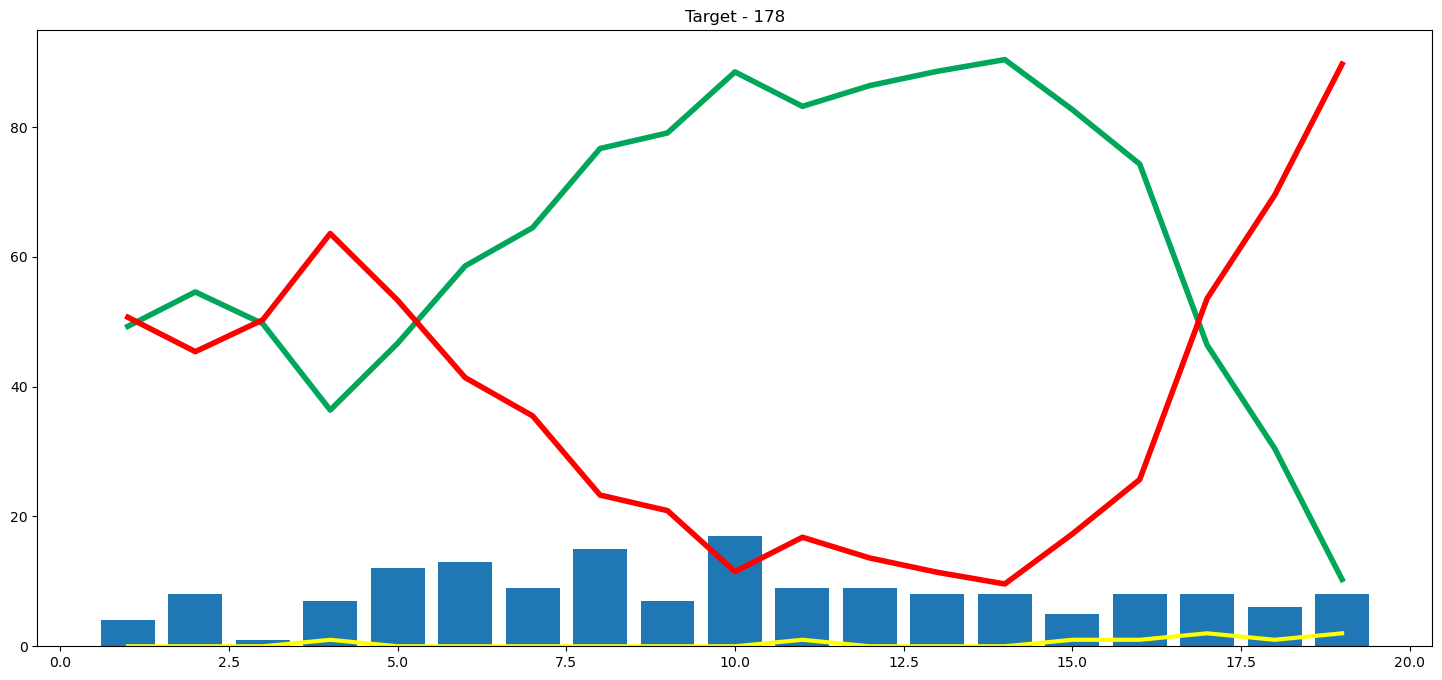

In [428]:
import matplotlib.pyplot as plt

# Create a new figure with a specific size
plt.figure(figsize=(18, 8))

# Plot wickets lost in each over
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color='yellow', linewidth=3)

# Plot win probabilities in each over
plt.plot(temp_df['end_of_over'], temp_df['win'], color='#00a65a', linewidth=4)

# Plot lose probabilities in each over
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4)

# Plot runs scored after each over as a bar plot
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])

# Set the title of the plot, including the target score
plt.title('Target - ' + str(target))


In [425]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [426]:
# Get unique cities listed in the 'city' column

delivery_df['city'].unique()

array(['Hyderabad', 'Mumbai', 'Indore', 'Kolkata', 'Bangalore',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Cuttack', 'Ahmedabad', 'Nagpur', 'Dharamsala', 'Visakhapatnam',
       'Ranchi', 'Delhi', 'Abu Dhabi', nan, 'Sharjah', 'Pune',
       'Bengaluru', 'Mohali'], dtype=object)

In [ ]:
# Import the pickle module for serialization
import pickle

# Serialize the trained machine learning pipeline (pipe) and save it to a file named 'pipe.pkl'
pickle.dump(pipe, open('pipe.pkl', 'wb'))
